In [ ]:
#Training an Image Classifier


#Steps:
# -> Load and normalizing the CIFAR10 training and test datasets using torchvision
# -> Define a Convolution Neural Network
# -> Define a loss function
# -> Train the network on the training data
# -> Test the network on the test data

In [1]:
#Loading and Normalizing CIFAR 10 Data
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
transform= transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

trainset= torchvision.datasets.CIFAR10(root="C:\\Users\\soumyama\\Documents\\Python Scripts\\personal tutorial\\PyTorch\\data", train=True,
                                      download=True, transform=transform)
trainloader= torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)

testset= torchvision.datasets.CIFAR10(root="C:\\Users\\soumyama\\Documents\\Python Scripts\\personal tutorial\\PyTorch\\data", train=False,
                                     download=True, transform=transform)
testloader= torch.utils.data.DataLoader(testset, batch_size=4,
                                       shuffle=False, num_workers=2)

classes=('plane', 'car', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


plane plane truck truck


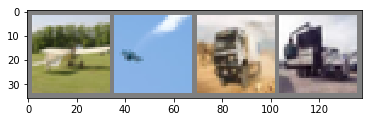

In [6]:
#Display images

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [53]:
#Define Convolution neural network

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1= nn.Conv2d(3,6,5)
        self.pool= nn.MaxPool2d(2,2)
        self.conv2= nn.Conv2d(6,16,5)
        self.fc1= nn.Linear(16*5*5, 240)
        self.fc2= nn.Linear(240,96)
        self.fc3= nn.Linear(96,10)
        
    def forward(self, x):
        x= self.pool(F.relu(self.conv1(x)))
        x= self.pool(F.relu(self.conv2(x)))
        x= x.view(-1, 16*5*5)
        x= F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x= self.fc3(x)
        return x

net=Net()

In [54]:
#Define Loss Functiona and Optimizer

import torch.optim as optim

criterion= nn.CrossEntropyLoss()
optimizer= optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [56]:
#Train the network
for epoch in range(50):
    
    running_loss= 0.0
    for i, data in enumerate(trainloader,0):
        #get inputs
        inputs, labels= data
        
        #zero the parameter gradients
        optimizer.zero_grad()
        
        #forward+backward+optimize
        outputs=net(inputs)
        loss= criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #print statistics
        running_loss+= loss.item()
        if i % 2000==1999: #printevery 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch+1, i+1, running_loss/2000))
            running_loss=0.0
print('Finished Training')

[1,  2000] loss: 0.888
[1,  4000] loss: 0.922
[1,  6000] loss: 0.923
[1,  8000] loss: 0.939
[1, 10000] loss: 0.935
[1, 12000] loss: 0.964
[2,  2000] loss: 0.815
[2,  4000] loss: 0.851
[2,  6000] loss: 0.879
[2,  8000] loss: 0.897
[2, 10000] loss: 0.869
[2, 12000] loss: 0.902
[3,  2000] loss: 0.752
[3,  4000] loss: 0.795
[3,  6000] loss: 0.806
[3,  8000] loss: 0.827
[3, 10000] loss: 0.843
[3, 12000] loss: 0.873
[4,  2000] loss: 0.708
[4,  4000] loss: 0.758
[4,  6000] loss: 0.783
[4,  8000] loss: 0.777
[4, 10000] loss: 0.803
[4, 12000] loss: 0.799
[5,  2000] loss: 0.665
[5,  4000] loss: 0.715
[5,  6000] loss: 0.726
[5,  8000] loss: 0.750
[5, 10000] loss: 0.778
[5, 12000] loss: 0.761
[6,  2000] loss: 0.620
[6,  4000] loss: 0.669
[6,  6000] loss: 0.681
[6,  8000] loss: 0.701
[6, 10000] loss: 0.739
[6, 12000] loss: 0.742
[7,  2000] loss: 0.579
[7,  4000] loss: 0.639
[7,  6000] loss: 0.671
[7,  8000] loss: 0.681
[7, 10000] loss: 0.682
[7, 12000] loss: 0.704
[8,  2000] loss: 0.537
[8,  4000] 

GroundTruth:    cat  ship  ship plane


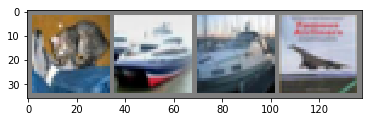

In [57]:
#test the network on test data

dataiter= iter(testloader)
images, labels= dataiter.next()

#print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'% classes[labels[j]] for j in range(4)))

In [58]:
outputs= net(images)

In [61]:
_, predicted= torch.max(outputs, 1)

print('Predicted:', ' '.join('%5s' % classes[predicted[j]] for j in range(4)) )

Predicted:  deer  ship plane  bird


In [62]:
#Check how the network performed on whole data set

correct=0
total=0
with torch.no_grad():
    for data in testloader:
        images, labels= data
        outputs= net(images)
        _, predicted= torch.max(outputs.data, 1)
        total+= labels.size(0)
        correct+=(predicted==labels).sum().item()
        
print('Accuracy of the network on test(10000) images is: %d%%' % (100* correct/total))

Accuracy of the network on test(10000) images is: 55%


In [63]:
#Check the accuracy within classes

class_correct= list(0. for i in range(10))
class_total= list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels= data
        outputs= net(images)
        _, predicted= torch.max(outputs, 1)
        c= (predicted == labels).squeeze()
        for i in range(4):
            label= labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100*class_correct[i]/class_total[i]))

Accuracy of plane : 48 %
Accuracy of   car : 71 %
Accuracy of  bird : 46 %
Accuracy of   cat : 41 %
Accuracy of  deer : 46 %
Accuracy of   dog : 40 %
Accuracy of  frog : 65 %
Accuracy of horse : 61 %
Accuracy of  ship : 71 %
Accuracy of truck : 60 %


In [64]:
#Training on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [65]:
net.to(device)
inputs, labels= inputs.to(device), labels.to(device)
